# Patent Landscape

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
current_path = os.getcwd()

In [3]:
data_set = pd.read_csv(current_path + "\\Dataset\\dataset_rq2.csv", low_memory=False) 

In [4]:
data_set.head(3)

,Publication_Number,Publication_Year,Applicants,IPCR_Classifications,Cat_Applicants
0,US 2015/0068116 A1,2015,BULLIS JAMES K,A01G17/04;;B62D49/00,Inventors as applicant
1,WO 2016/187002 A1,2016,MAKO SURGICAL CORP,A61B34/10;;A61B34/30;;A61B34/35;;B25J9/16,FIRMS
2,AU 2016/263106 A1,2017,MAKO SURGICAL CORP,A61B34/10;;A61B34/30;;A61B34/35;;B25J9/16,FIRMS


In [5]:
data_set.shape

(383, 5)

### 1. General trend of the sector

In [6]:
s = data_set['Publication_Year'].value_counts().sort_values(ascending=True)

In [7]:
s.sort_index(inplace=True)

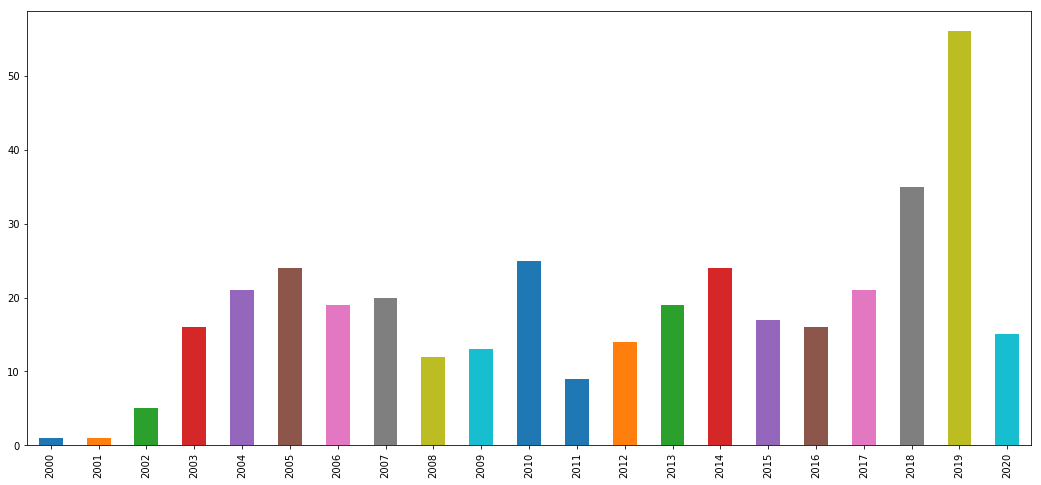

In [8]:
s.plot.bar(figsize=(18,8))
plt.show()

In [9]:
data_set.shape

(383, 5)

In [10]:
    data_set.Applicants.replace('BAYER CROPSCIENCE GMBH', 'BAYER CROPSCIENCE', inplace = True)
    data_set.Applicants.replace('BAYER CROPSCIENCE SA;;SCHNATTERER STEFAN;;MAIER MICHAEL;;LOCHHAAS FRIEDERIKE;;KNAUF WERNER;;SEEGER KARL', 'BAYER CROPSCIENCE', inplace = True)
    data_set.Applicants.replace('JOHN NICHOLAS AND KRISTIN GROSS TRUST U A D APRIL 13 2010;;GROSS JOHN NICHOLAS', 'LAW OFFICE OF J. GROSS', inplace = True)
    data_set.Applicants.replace('APPLIED MATERIALS INC;;LUBOMIRSKY DMITRY;;SHANMUGASUNDRAM ARULKUMAR;;ELLWANGER RUSSELL;;PANCHAM IAN A;;CHEBOLI RAMAKRISHNA;;WEIDMAN TIMOTHY W', 'APPLIED MATERIALS INC', inplace = True)
    data_set.Applicants.replace('UNIV UTAH;;FURSE CYNTHIA;;MAHONEY JOHN;;CHUNG YOU CHUNG;;LO CHET;;AMARNATH NIRMAL NATH;;FARHANG-BOROUJENY BEHROUZ', 'UNIV UTAH', inplace = True)
    data_set.Applicants.replace('ETHICON ENDO SURGERY INC;;PARIHAR SHAILENDRA K;;LEIMBACH JESSICA PYZOHA;;LUDZACK MICHAEL R', 'ETHICON ENDO SURGERY INC', inplace = True)

### 2. Applicants analysis

In [11]:
applicants = data_set['Applicants'].value_counts().sort_values(ascending=True)

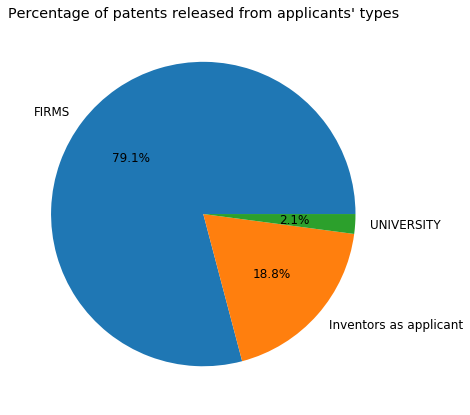

In [12]:
plt.rcParams.update({'font.size': 12})
plt.ylabel("",size=0, color='white')
plt.title('Percentage of patents released from applicants\' types')
data_set.Cat_Applicants.value_counts().plot.pie(figsize=(7,7), autopct='%.1f%%')

In [13]:
applicants = applicants.sort_values(ascending=False)
top_10_applicants = applicants[:10]
top_10_applicants

BAYER CROPSCIENCE                  45
ADVANCED ELEMENTAL TECHNOLOGIES    12
APPLIED MATERIALS INC               9
ANDERSON NOEL WAYNE                 9
INDIGO AG INC                       9
LAW OFFICE OF J. GROSS              9
WEEDOUT LTD                         8
GOOGLE INC                          8
ETHICON ENDO SURGERY INC            6
CRINKLAW FARM SERVICES INC          6
Name: Applicants, dtype: int64

### Unpacking IPC

In [14]:
cluster1 = ['A01C', 'A01B', 'B23C', 'A01D', 'B23Q', 'B26D']
cluster2 = ['A01G', 'A23N']
cluster3 = ['G06K', 'G06F']
cluster4 = ['G01N', 'G06T', 'H04N', 'G06G', 'G01J', 'G08G', 'G01S', 'A61B']
cluster5 = ['B05B', 'G05B', 'B05D']
cluster6 = ['H04W', 'H04L', 'H04B']
cluster7 = ['H01L', 'B60L', 'H05K', 'G01R']

dd = pd.DataFrame()
dd["Subclass"] = ""
dd["Publication_Year"] = ""
dd["Applicants"] = ""
dd["Subclass_Cluster"] = ""

i = 0
for idx in range(len(data_set)):
    ipcr_list = data_set.loc[idx,"IPCR_Classifications"].split(';;')
    ipcr_4_list = [x[:4] for x in ipcr_list]
    for ipc in ipcr_4_list:
        if ipc in cluster1:
            dd.at[i,"Subclass_Cluster"] = "Soil treatment"
            dd.at[i,"Applicants"] = data_set.loc[idx,"Applicants"]
            dd.at[i,"Publication_Year"] = data_set.loc[idx,"Publication_Year"]            
            dd.at[i,"Subclass"] = ipc
            i+=1
        elif ipc in cluster2:
            dd.at[i,"Subclass_Cluster"] = "Final product treatment"
            dd.at[i,"Applicants"] = data_set.loc[idx,"Applicants"]
            dd.at[i,"Publication_Year"] = data_set.loc[idx,"Publication_Year"]                        
            dd.at[i,"Subclass"] = ipc
            i+=1        
        elif ipc in cluster3:
            dd.at[i,"Subclass_Cluster"] = "Data computing"
            dd.at[i,"Applicants"] = data_set.loc[idx,"Applicants"]
            dd.at[i,"Publication_Year"] = data_set.loc[idx,"Publication_Year"]            
            dd.at[i,"Subclass"] = ipc
            i+=1        
        elif ipc in cluster4:
            dd.at[i,"Subclass_Cluster"] = "Analysis and optical instruments"
            dd.at[i,"Applicants"] = data_set.loc[idx,"Applicants"]
            dd.at[i,"Publication_Year"] = data_set.loc[idx,"Publication_Year"]            
            dd.at[i,"Subclass"] = ipc
            i+=1        
        elif ipc in cluster5:
            dd.at[i,"Subclass_Cluster"] = "Spraying apparatus"
            dd.at[i,"Applicants"] = data_set.loc[idx,"Applicants"]
            dd.at[i,"Publication_Year"] = data_set.loc[idx,"Publication_Year"]            
            dd.at[i,"Subclass"] = ipc
            i+=1        
        elif ipc in cluster6:
            dd.at[i,"Subclass_Cluster"] = "Data transmission"
            dd.at[i,"Applicants"] = data_set.loc[idx,"Applicants"]
            dd.at[i,"Publication_Year"] = data_set.loc[idx,"Publication_Year"]            
            dd.at[i,"Subclass"] = ipc
            i+=1        
        elif ipc in cluster7:
            dd.at[i,"Subclass_Cluster"] = "Electrical devices and methods"
            dd.at[i,"Applicants"] = data_set.loc[idx,"Applicants"]
            dd.at[i,"Publication_Year"] = data_set.loc[idx,"Publication_Year"]            
            dd.at[i,"Subclass"] = ipc
            i+=1

In [15]:
dd.shape

(390, 4)

In [16]:
dd.head(10)

,Subclass,Publication_Year,Applicants,Subclass_Cluster
0,A01G,2015,BULLIS JAMES K,Final product treatment
1,A61B,2016,MAKO SURGICAL CORP,Analysis and optical instruments
2,A61B,2016,MAKO SURGICAL CORP,Analysis and optical instruments
3,A61B,2016,MAKO SURGICAL CORP,Analysis and optical instruments
4,A61B,2017,MAKO SURGICAL CORP,Analysis and optical instruments
5,A61B,2017,MAKO SURGICAL CORP,Analysis and optical instruments
6,A61B,2017,MAKO SURGICAL CORP,Analysis and optical instruments
7,G06K,2017,UNIV CARNEGIE MELLON,Data computing
8,G06T,2015,UNIV TIANJING TECH & EDUCATION,Analysis and optical instruments
9,G06T,2018,CANON KK,Analysis and optical instruments


### Bubble chart Cluster Technological Sectors / Years

In [17]:
grouped=dd.groupby(['Subclass_Cluster','Publication_Year']).size().to_frame('Count').reset_index()
grouped.head()

,Subclass_Cluster,Publication_Year,Count
0,Analysis and optical instruments,2001,1
1,Analysis and optical instruments,2002,1
2,Analysis and optical instruments,2003,1
3,Analysis and optical instruments,2004,4
4,Analysis and optical instruments,2005,2


In [18]:
classes = list(grouped.Subclass_Cluster.values)
years = list(grouped.Publication_Year.values)
sizes = list(grouped.Count.values)
increase_of = 40
sizes = [x*increase_of for x in sizes]

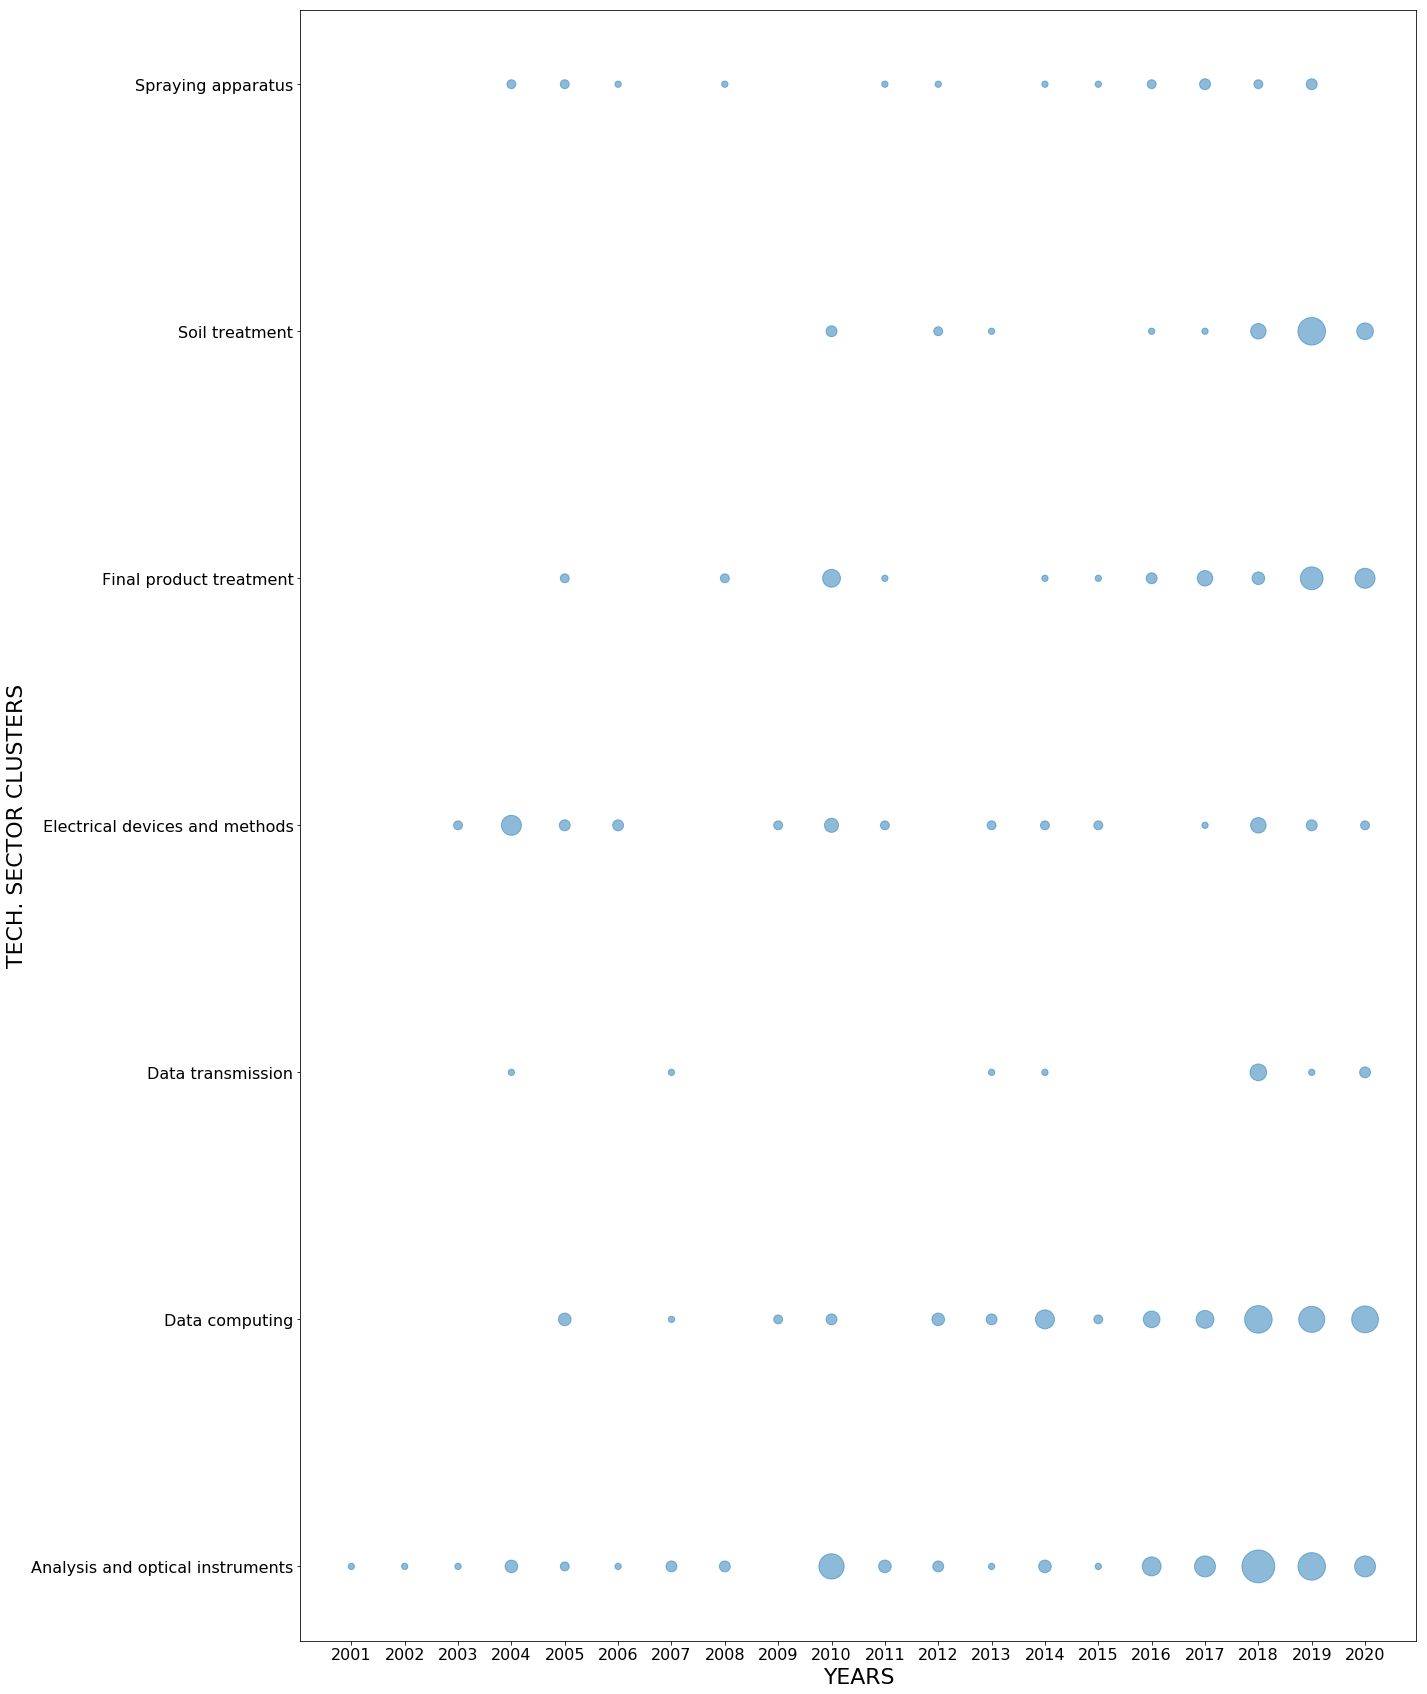

In [19]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (20,30)
plt.scatter(x=years, y=classes, s=sizes, alpha=0.5)
plt.xlabel("YEARS", size=22)
plt.ylabel("TECH. SECTOR CLUSTERS", size=22)
ticks = plt.xticks(np.arange(min(set(years)), max(set(years))+1, 1))

### Bubble chart Selected Technological Sectors / Years

In [20]:
grouped=dd.groupby(['Subclass','Publication_Year']).size().to_frame('Count').reset_index()

In [21]:
classes = list(grouped.Subclass.values)
years = list(grouped.Publication_Year.values)
sizes = list(grouped.Count.values)
increase_of = 40
sizes = [x*increase_of for x in sizes]

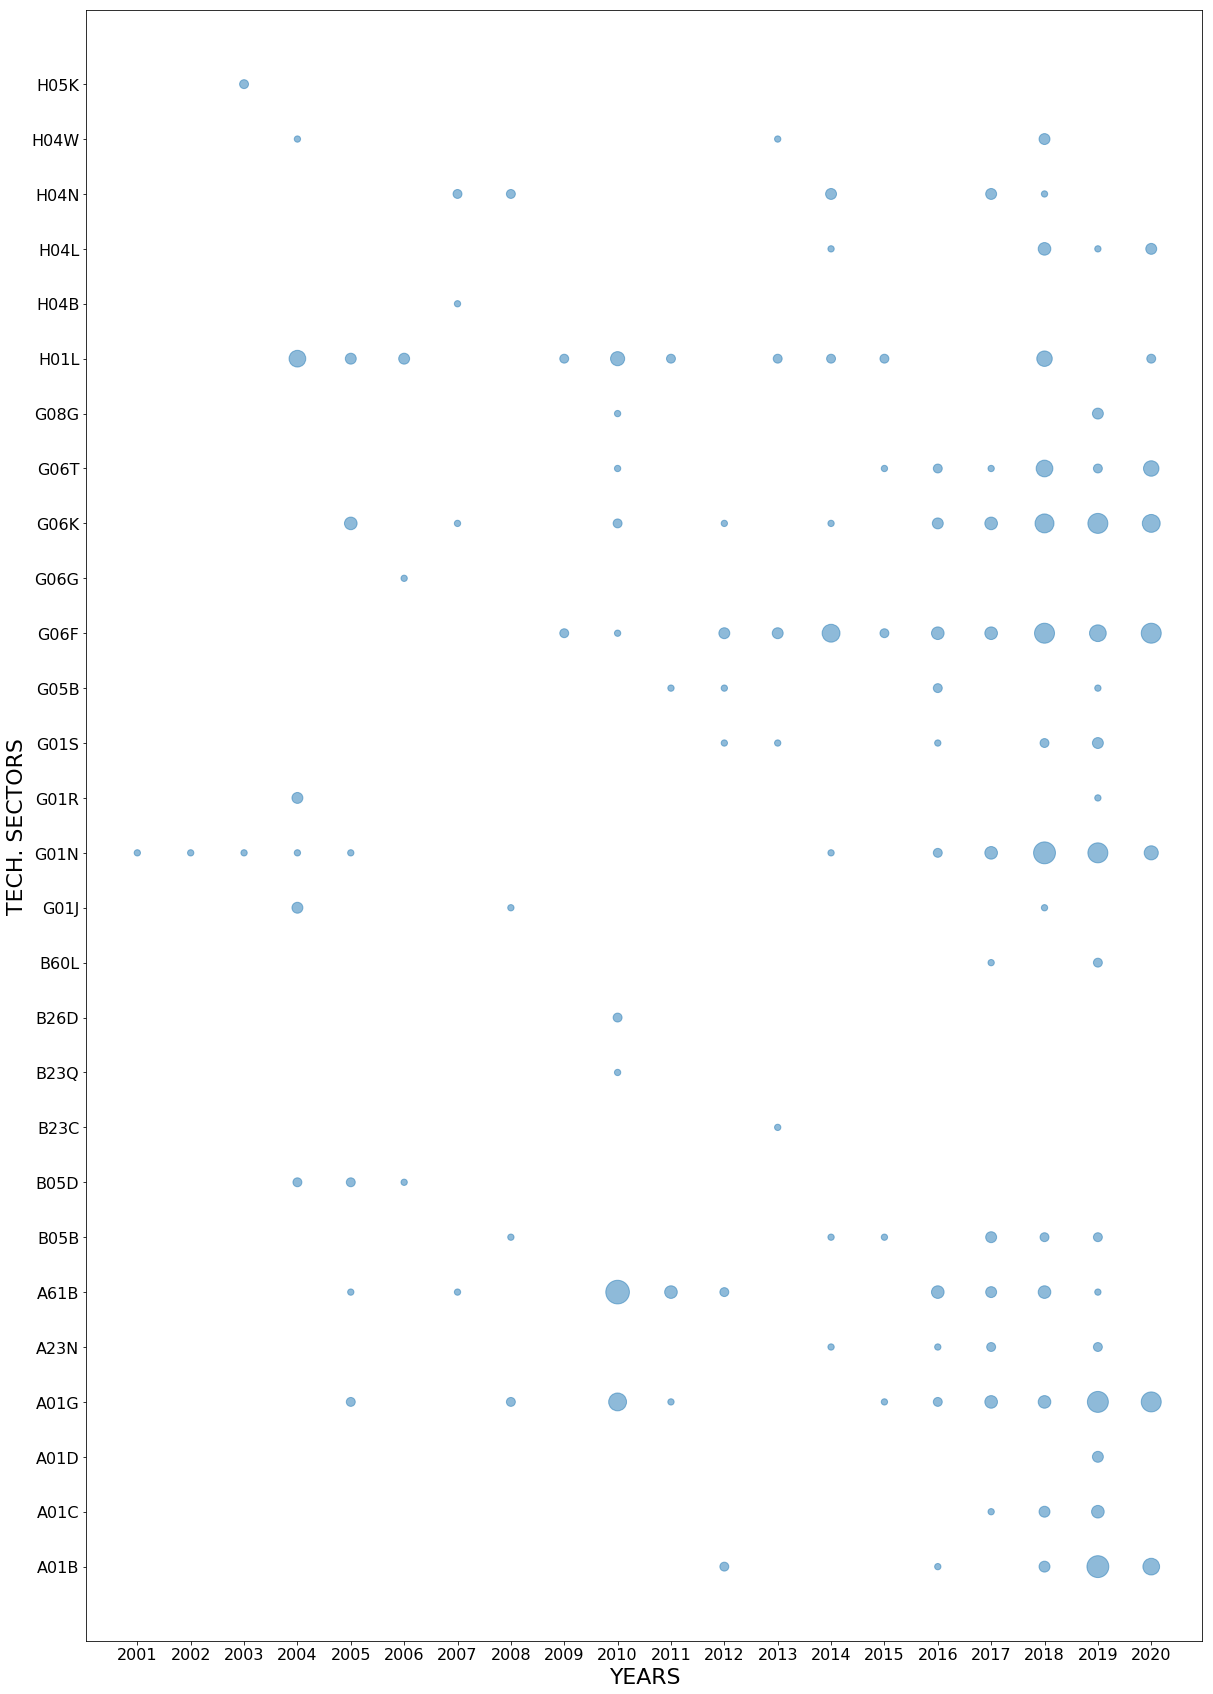

In [22]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (20,30)
plt.scatter(x=years, y=classes, s=sizes, alpha=0.5)
plt.xlabel("YEARS", size=22)
plt.ylabel("TECH. SECTORS", size=22)
ticks = plt.xticks(np.arange(min(set(years)), max(set(years))+1, 1))

### Bubble chart Cluster Technological Sectors / Top 20 companies

In [23]:
applicants = dd['Applicants'].value_counts().sort_values(ascending=False)
top_20_applicants = applicants[:20]
top_20_applicants

ADVANCED ELEMENTAL TECHNOLOGIES    31
CRINKLAW FARM SERVICES INC         21
APPLIED MATERIALS INC              19
BEAR FLAG ROBOTICS INC             18
GOOGLE INC                         15
GROW SOLUTIONS TECH LLC            14
ETHICON ENDO SURGERY INC           13
DEERE & CO                         12
UNIV CALIFORNIA                     8
UNIV ILLINOIS                       8
ANDERSON NOEL WAYNE                 8
ELEOS ROBOTICS INC                  7
ADROIT ROBOTICS                     7
AMERICAN SCIENCE & ENG INC          7
UNIV UTAH                           7
MAKO SURGICAL CORP                  6
UNIV CARNEGIE MELLON                6
UNIV PENNSYLVANIA                   6
FRUITSPEC LTD                       6
OSRAM GMBH                          5
Name: Applicants, dtype: int64

In [24]:
dd1 = dd.loc[dd["Applicants"].isin(list(top_20_applicants.index))]

In [25]:
grouped=dd1.groupby(['Applicants','Subclass_Cluster']).size().to_frame('Count').reset_index()
grouped.head(5)

,Applicants,Subclass_Cluster,Count
0,ADROIT ROBOTICS,Analysis and optical instruments,4
1,ADROIT ROBOTICS,Data computing,2
2,ADROIT ROBOTICS,Soil treatment,1
3,ADVANCED ELEMENTAL TECHNOLOGIES,Data computing,24
4,ADVANCED ELEMENTAL TECHNOLOGIES,Data transmission,7


In [26]:
clusters = list(grouped.Subclass_Cluster.values)
top_applicants = list(grouped.Applicants.values)
sizes = list(grouped.Count.values)
increase_of = 150
sizes = [x*increase_of for x in sizes]

In [27]:
clusters_acronym = []
for c in clusters:
    if c == 'Analysis and optical instruments':
        clusters_acronym.append('AOI')
    if c == 'Data computing':
        clusters_acronym.append('DC')
    if c == 'Data transmission':
        clusters_acronym.append('DT')        
    if c == 'Final product treatment':
        clusters_acronym.append('FPT')
    if c == 'Soil treatment':
        clusters_acronym.append('ST')
    if c == 'Spraying apparatus':
        clusters_acronym.append('SA')
    if c == 'Electrical devices and methods':
        clusters_acronym.append('EDM')

Text(0, 0.5, 'APPLICANTS')

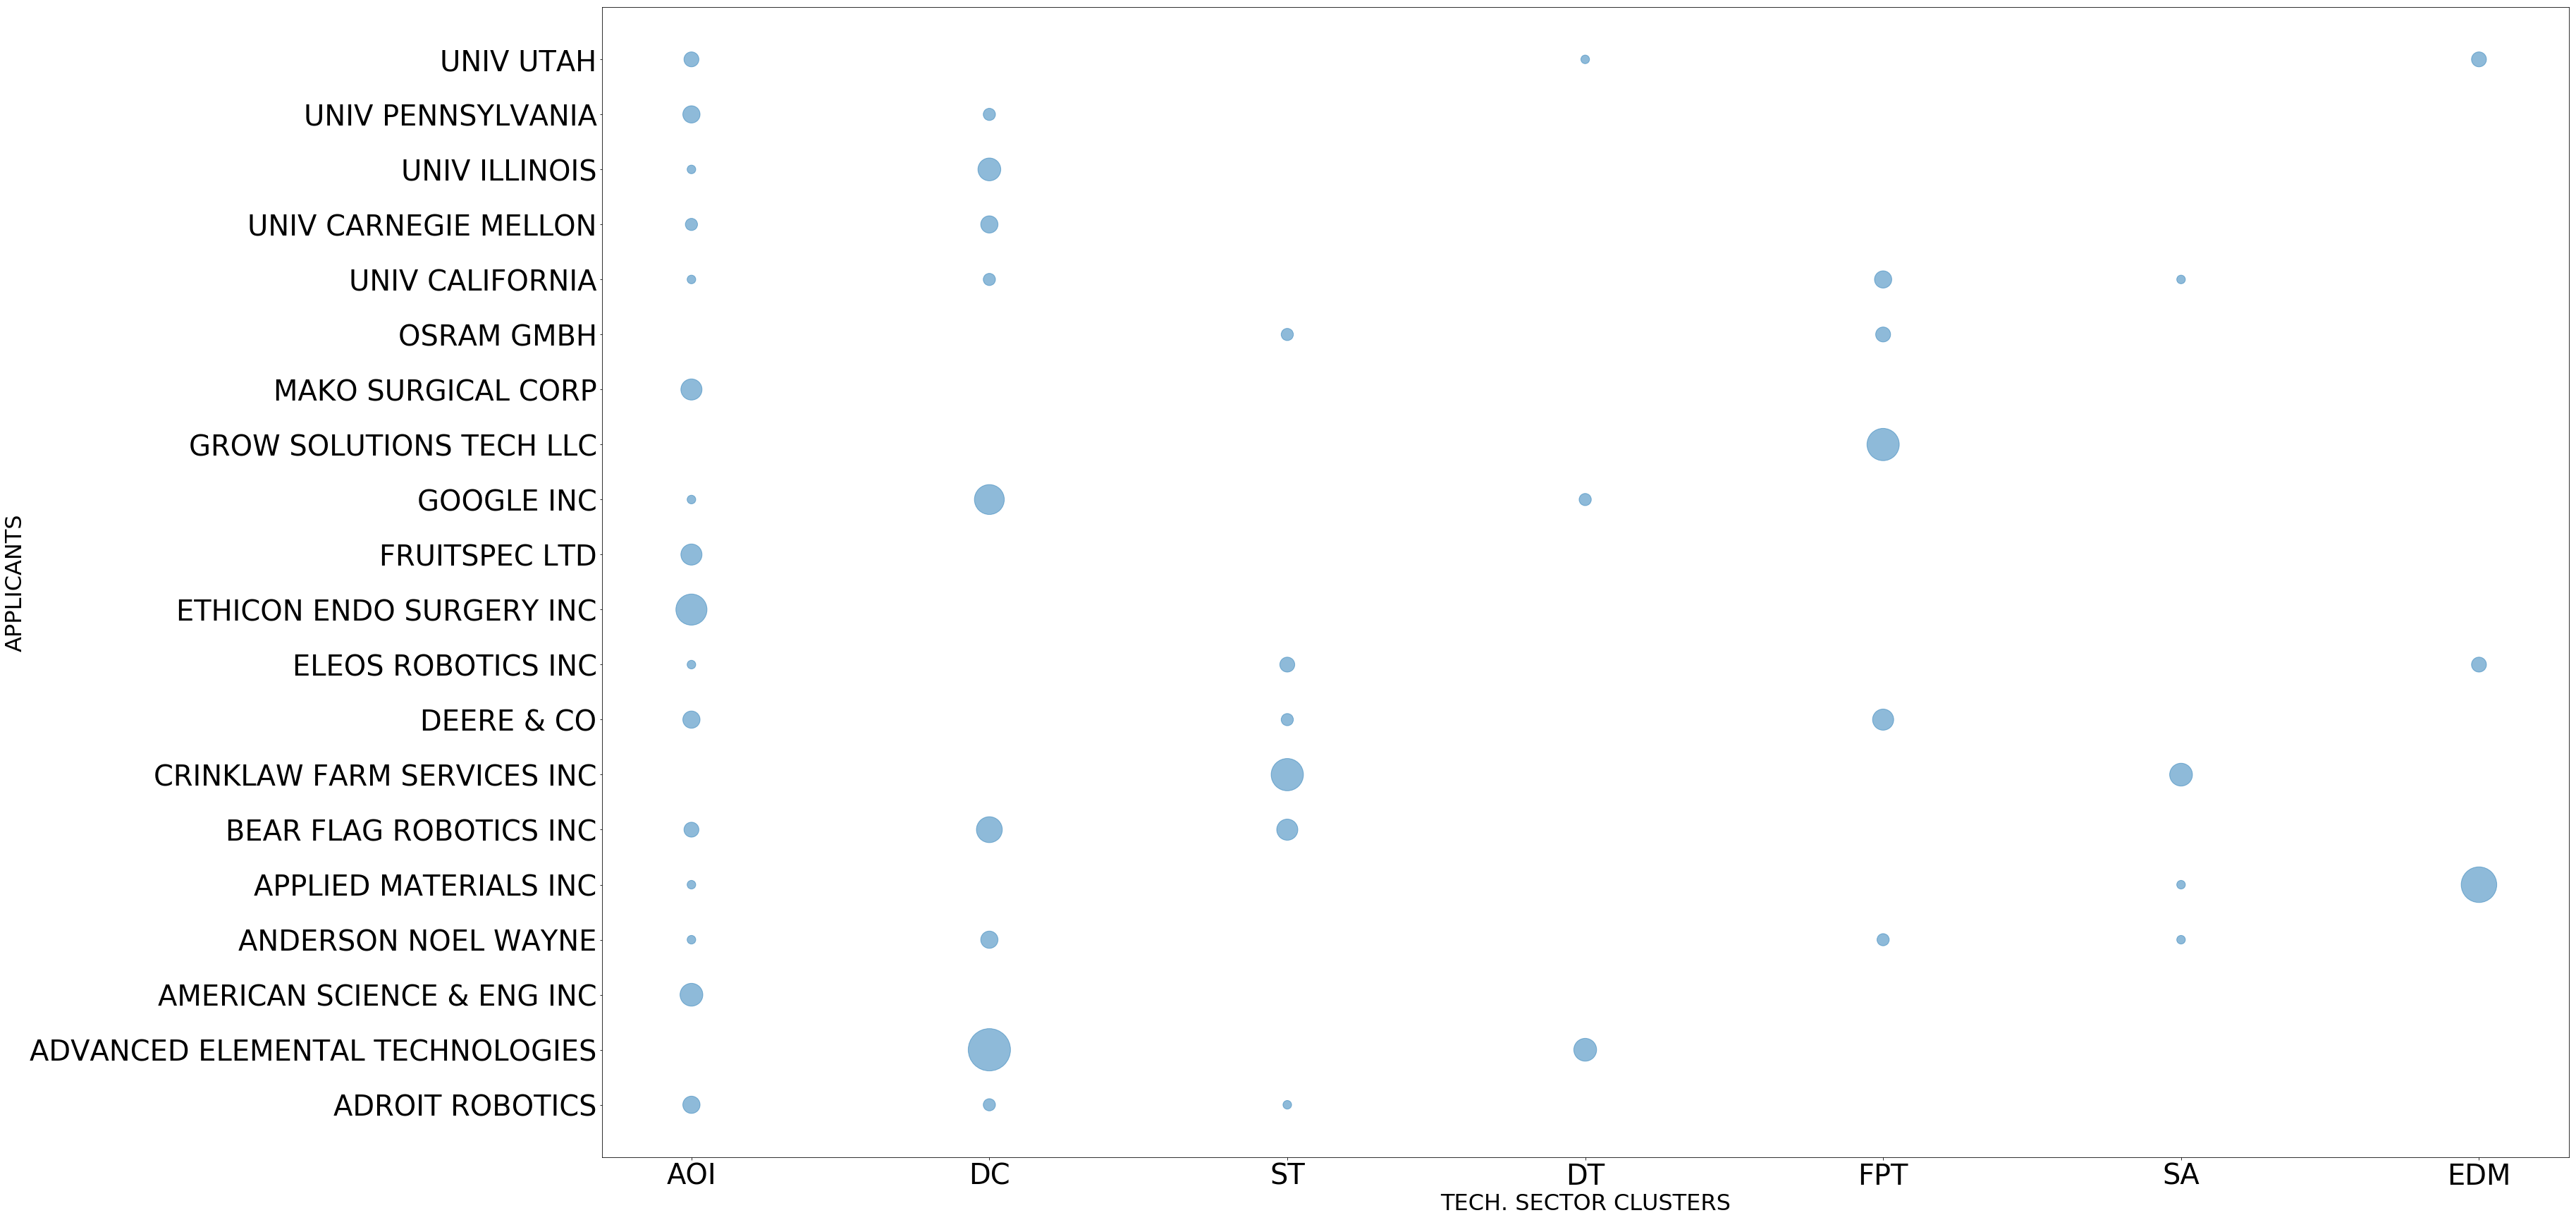

In [28]:
plt.rcParams.update({'font.size': 40})
plt.rcParams["figure.figsize"] = (50,30)
plt.scatter(x=clusters_acronym, y=top_applicants, s=sizes, alpha=0.5)
plt.xlabel("TECH. SECTOR CLUSTERS", size=32)
plt.ylabel("APPLICANTS", size=32)

### Bubble chart Selected Technological Sectors / Top 20 companies

In [29]:
grouped=dd1.groupby(['Applicants','Subclass']).size().to_frame('Count').reset_index()
grouped.head()

,Applicants,Subclass,Count
0,ADROIT ROBOTICS,A01B,1
1,ADROIT ROBOTICS,G01N,1
2,ADROIT ROBOTICS,G06K,2
3,ADROIT ROBOTICS,G06T,3
4,ADVANCED ELEMENTAL TECHNOLOGIES,G06F,24


In [30]:
classes = list(grouped.Subclass.values)
top_applicants = list(grouped.Applicants.values)
sizes = list(grouped.Count.values)
increase_of = 150
sizes = [x*increase_of for x in sizes]

Text(0, 0.5, 'APPLICANTS')

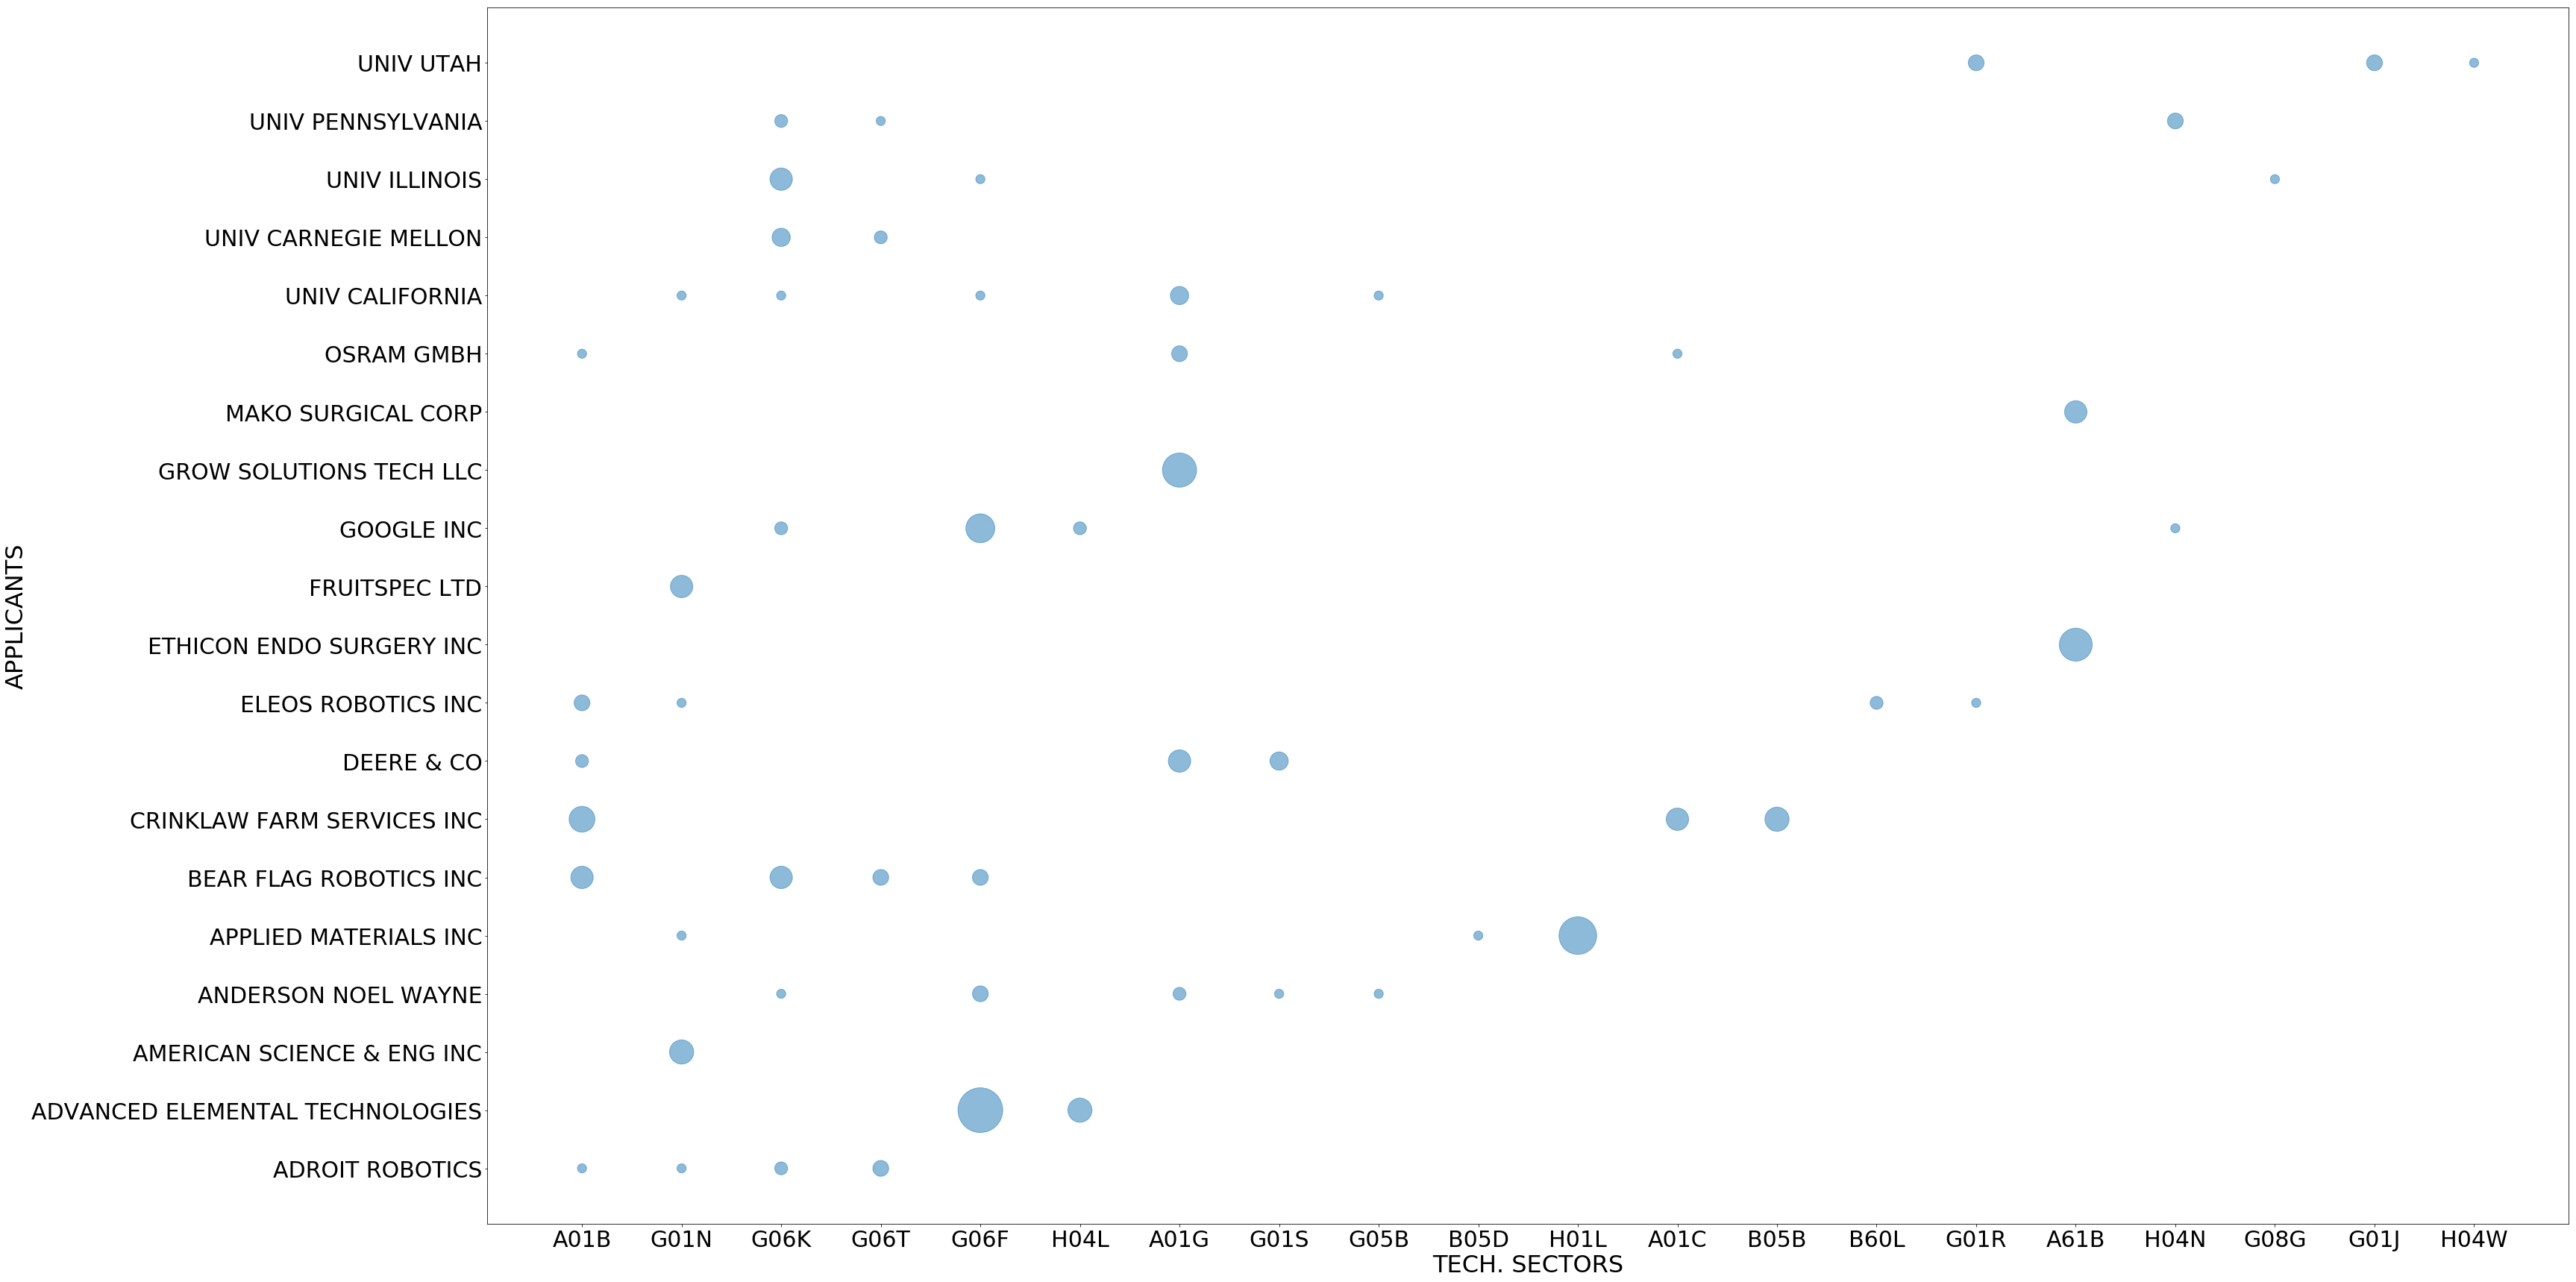

In [31]:
plt.rcParams.update({'font.size': 30})
plt.rcParams["figure.figsize"] = (50,30)
plt.scatter(x=classes, y=top_applicants, s=sizes, alpha=0.5)
plt.xlabel("TECH. SECTORS", size=32)
plt.ylabel("APPLICANTS", size=32)